# Tutorial de Matplotlib: 4. Etiquetas y Anotaciones

Una parte importante para generar gráficos más útiles e informativos es cómo etiquetamos sus ejes o añadimos las anotaciones pertinentes. Ya se ha visto parte de este proceso mediante el uso de los comandos ``set_xlabel``, ``set_ylabel`` y ``set_title``.  En esta seción veremos otras formas de añadir texto y anotaciones adicionales usando los comandos ``text`` y ``annotate``, al mismo tiempo que cubriremos también la posibilidad de realizar un ajuste más fino de las marcas a indicar en los ejes usando instancias de ``Formatter`` y ``Locator``.

         Última revisión: 09/04/2020

In [1]:
# Como siempre, empezaremos importando los módulos habituales
import numpy as np
import matplotlib.pyplot as plt

## Añadiendo texto

El texto puede ser añadido a los ejes de diversas maneras. La manera más simple sería usar el comando [``text``](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html). De momento aquí sólo presentaremos una versión básica del comando, indicando sólamente la posición del texto insertado, así como el tamaño de la fuente utilizada y el alineamiento horizontal `ha` y vertical `va`:

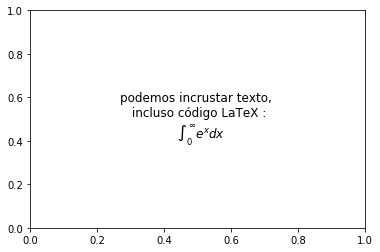

In [2]:
fig, ax = plt.subplots()
ax.text(0.5, 0.5, 'podemos incrustar texto, \n incluso código LaTeX :\n  $\int_0^\infty e^x dx$'
        ,fontsize=12, ha='center', va='center');

El comando anterior muestra el texto usando coordenadas: esto es, al mismo tiempo que cambiamos los límites en las variables ``x`` e ``y`` el texto se irá moviendo a lo largo de dichos ejes. También es posible colocar texto en un lugar concreto de la figura. Estas localizaciones alternan entre 0's y 1's, para indicar una localización desde la parte inferior-izquierda de la figura hasta la parte superior-derecha:

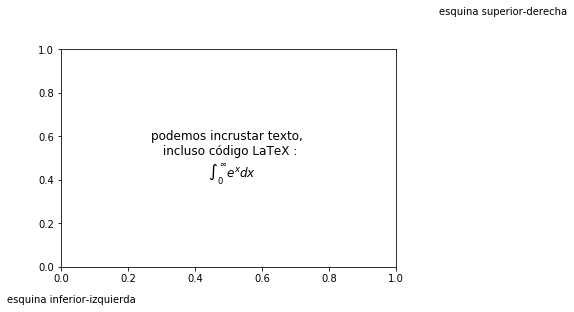

In [7]:
fig.text(0, 0, 'esquina inferior-izquierda')
         #, ha = 'right', va = 'bottom')
fig.text(1, 1, 'esquina superior-derecha')
         #, ha='left', va='top')
fig      # puede modificar estas alineaciones para ver el efecto

También es posible colocar texto relativo a los *ejes* coordenados, pero resulta más fácil con el comando [``annotate``](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.annotate.html) en vez del comando ``text``:

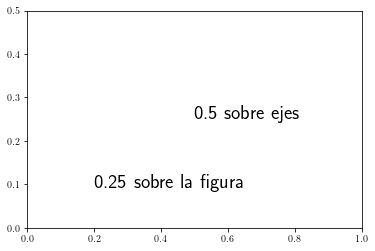

In [9]:
fig, ax = plt.subplots()

ax.annotate('0.5 sobre ejes',       (0.5, 0.5),   xycoords='axes fraction'  , size=20)
ax.annotate('0.25 sobre la figura', (0.25, 0.25), xycoords='figure fraction', size=20)
ax.set_ylim(0, 0.5);

El comando `annotate` también tiene otras potentes características: como por ejemplo ser usada para etiquetar automáticamente partes de los ejes [con flechas o arcos de flecha](https://matplotlib.org/tutorials/text/annotations.html#annotating-with-arrow).

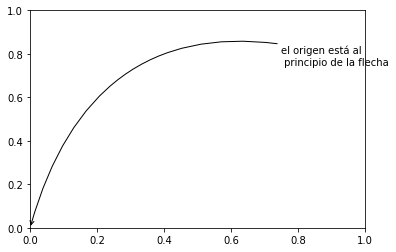

In [5]:
fig, ax = plt.subplots()

ax.annotate('el origen está al \n principio de la flecha',  (0, 0), (0.75, 0.75),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3, rad=0.5'),
            xycoords='data', textcoords='axes fraction');

Hay un cierto número de diferentes estilos de flechas disponibles, que pueden ser consultadas en la documentación online.

También se puede ver a continuación un [ejemplo](https://matplotlib.org/gallery/text_labels_and_annotations/usetex_demo.html#sphx-glr-gallery-text-labels-and-annotations-usetex-demo-py) mucho más elaborado extraido de la documentación correspondiente que hace uso de opciones concretas del comando [`rc`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.rc.html):

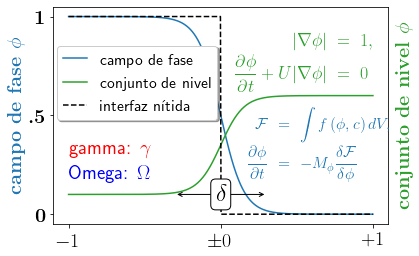

In [5]:
plt.rc('text', usetex=True)
# perfil de seguimiento de interfaz
N = 500
delta = 0.6
X = np.linspace(-1, 1, N)
plt.plot(X, (1 - np.tanh(4 * X / delta)) / 2,      # perfiles de campo de fase
         X, (1.4 + np.tanh(4 * X / delta)) / 4, "C2",  # perfil de composición
         X, X < 0, 'k--')                              # interfaz nítida

# leyenda
plt.legend(('campo de fase', 'conjunto de nivel', 'interfaz nítida'),
           shadow=True, loc=(0.01, 0.48), handlelength=1.5, fontsize=16)

# la flecha
plt.annotate("", xy=(-delta / 2., 0.1), xytext=(delta / 2., 0.1),
             arrowprops=dict(arrowstyle="<->", connectionstyle="arc3"))
plt.text(0, 0.1, r'$\delta$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

# Usando texto en las etiquetas
plt.xticks((-1, 0, 1), ('$-1$', r'$\pm 0$', '$+1$'), color='k', size=20)

# Etiqueta izquierda del eje Y, combinando modo matemático y modo texto
plt.ylabel(r'\bf{campo de fase} $\phi$', {'color': 'C0', 'fontsize': 20})
plt.yticks((0, 0.5, 1), (r'\bf{0}', r'\bf{.5}', r'\bf{1}'), color='k', size=20)

# Etiquetas del lado derecho del eje Y
plt.text(1.02, 0.5, r"\bf{conjunto de nivel} $\phi$", {'color': 'C2', 'fontsize': 20},
         horizontalalignment='left',
         verticalalignment='center',
         rotation=90,
         clip_on=False,
         transform=plt.gca().transAxes)

# Usando un entorno multilínea dentro de un texto.
# ecuaciones del conjunto de nivel
eq1 = r"\begin{eqnarray*}" + \
      r"|\nabla\phi| &=& 1,\\" + \
      r"\frac{\partial \phi}{\partial t} + U|\nabla \phi| &=& 0 " + \
      r"\end{eqnarray*}"
plt.text(1, 0.9, eq1, {'color': 'C2', 'fontsize': 18}, va="top", ha="right")

# ecuaciones del campo de fase
eq2 = r'\begin{eqnarray*}' + \
      r'\mathcal{F} &=& \int f\left( \phi, c \right) dV, \\ ' + \
      r'\frac{ \partial \phi } { \partial t } &=& -M_{ \phi } ' + \
      r'\frac{ \delta \mathcal{F} } { \delta \phi }' + \
      r'\end{eqnarray*}'
plt.text(0.18, 0.18, eq2, {'color': 'C0', 'fontsize': 16})

plt.text(-1, .30, r'gamma: $\gamma$', {'color': 'r', 'fontsize': 20})
plt.text(-1, .18, r'Omega: $\Omega$', {'color': 'b', 'fontsize': 20})

plt.show()

## Controlando las Propiedades de los Ejes

A menudo también se desea poder realizar un ajuste más fino de las etiquetas de las marcas en los ejes, y controlar de manera explícita dónde aparecerán, la longitud de dichas marcas, o incluso la posibilidad de eliminarlas por completo. Esto se puede conseguir gracias a los objetos ``Formatter`` y ``Locator``. Con ``Locator`` podremos controlar dónde se pondrán las marcas. Seguidamente mostramos algunas de las opciones disponibles:
- ``plt.MultipleLocator``: coloca las marcas usando un múltiplo de cierto valor
- ``plt.MaxNLocator``: usa un número máximo de marcas en el rango de valores dado
- ``plt.NullLocator``: en este caso no se añaden marcas al gráfico

Por otro lado los objetos de la clase ``Formatter`` controlarán qué etiquetas serán mostradas en las correspondientes marcas.

Algunas opciones útiles son las siguientes:

- ``plt.FormatStrFormatter``: usará un formato concreto (como por ejemplo ``'%.2g``) en cada marca
- ``plt.FuncFormatter``: especifica una función definida por el usuario
- ``plt.NullFormatter``: para no etiquetar ninguna de las marcas

Cualquiera de estas opciones puede ser aplicada tanto a marcas principales (major ticks) como secundarias (minor ones), usando las
funciones

- ``set_major_formatter``, ``set_major_locator``
- ``set_minor_formatter``, ``set_minor_locator``

Veremos algunos ejemplos a continuación

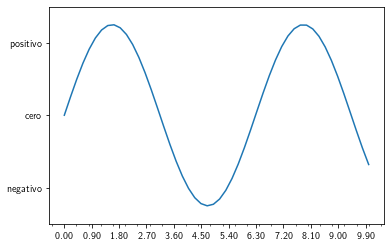

In [14]:
fig, ax = plt.subplots()

x = np.linspace(0, 10)
ax.plot(x, np.sin(x))

ax.xaxis.set_major_locator(plt.MultipleLocator(0.9))
ax.yaxis.set_major_locator(plt.MaxNLocator(3))

ax.xaxis.set_minor_locator(plt.MultipleLocator(0.4))
ax.yaxis.set_minor_locator(plt.NullLocator())  # no marcas (por defecto)

ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))  # float con 2 decimales


def format(val, pos):
    if val > 0:
        return "positivo"
    elif val < 0:
        return "negativo"
    else:
        return "cero"
    
ax.yaxis.set_major_formatter(plt.FuncFormatter(format))
ax.set_ylim(-1.2, 1.2);

Usando alguna de estas combinaciones (u otras que no se han visto aquí) es posible dar lugar a gráficos muy diversos y vistosos, como el que sigue por ejemplo.

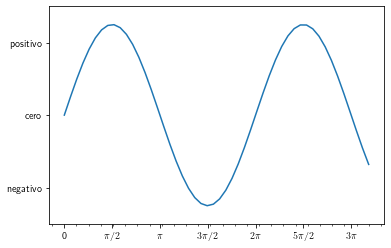

In [12]:
def format_func(value, tick_number):
    # encontrando los múltiplos de pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return "$\pi/2$"
    elif N == 2:
        return "$\pi$"
    elif N % 2 > 0:
        return "${0}\pi/2$".format(N)
    else:
        return "${0}\pi$".format(N // 2)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

Nótese también que al no haber especificado nada acerca del formateo del eje $Oy$ se ha empleado el que ya se tenía predefinido para la figura anterior.